In [1]:
import re
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
sps_capacity = pickle.load(open('./sps_capacity_df.pkl', 'rb'))

In [3]:
sps_capacity

,InstanceType,Region,AvailabilityZoneId,Score,Capacity,TimeStamp
0,c5.xlarge,ap-northeast-1,apne1-az1,3,2,2021-12-08 07:09:01+00:00
1,c5.xlarge,ap-northeast-1,apne1-az1,3,4,2021-12-08 07:09:01+00:00
2,c5.xlarge,ap-northeast-1,apne1-az1,3,8,2021-12-08 07:09:01+00:00
3,c5.xlarge,ap-northeast-1,apne1-az1,3,16,2021-12-08 07:09:01+00:00
4,c5.xlarge,ap-northeast-1,apne1-az1,3,32,2021-12-08 07:09:01+00:00
...,...,...,...,...,...,...
5523805,t4g.xlarge,us-west-2,usw2-az4,3,4,2021-12-16 05:09:03+00:00
5523806,t4g.xlarge,us-west-2,usw2-az4,3,8,2021-12-16 05:09:03+00:00
5523807,t4g.xlarge,us-west-2,usw2-az4,3,16,2021-12-16 05:09:03+00:00
5523808,t4g.xlarge,us-west-2,usw2-az4,3,32,2021-12-16 05:09:03+00:00


### 01. Build DF with Instance Class

In [4]:
# check number of available regions by instance family
instance_types = sps_capacity['InstanceType']
instance_classes = instance_types.str.extract('([a-zA-Z]+)', expand=True)
sps_capacity['InstanceClass'] = instance_classes

class_df = sps_capacity[['InstanceClass', 'Region', 'Score', 'Capacity', 'TimeStamp']]

In [5]:
class_df

,InstanceClass,Region,Score,Capacity,TimeStamp
0,c,ap-northeast-1,3,2,2021-12-08 07:09:01+00:00
1,c,ap-northeast-1,3,4,2021-12-08 07:09:01+00:00
2,c,ap-northeast-1,3,8,2021-12-08 07:09:01+00:00
3,c,ap-northeast-1,3,16,2021-12-08 07:09:01+00:00
4,c,ap-northeast-1,3,32,2021-12-08 07:09:01+00:00
...,...,...,...,...,...
5523805,t,us-west-2,3,4,2021-12-16 05:09:03+00:00
5523806,t,us-west-2,3,8,2021-12-16 05:09:03+00:00
5523807,t,us-west-2,3,16,2021-12-16 05:09:03+00:00
5523808,t,us-west-2,3,32,2021-12-16 05:09:03+00:00


### 02. Groupby Class & Capacity

In [6]:
groupby_class = class_df.groupby(by=['InstanceClass', 'Capacity']).mean().sort_values(by=['InstanceClass', 'Capacity'])

In [7]:
groupby_class

Score
InstanceClass Capacity          
c             2         2.965196
              4         2.942883
              8         2.854956
              16        2.676804
              32        2.507715
              50        2.376422
d             2         2.841338
              4         2.306515
              8         1.656150
              16        1.291411
              32        1.113672
              50        1.023079
g             2         2.340903
              4         2.151535
              8         1.977084
              16        1.744256
              32        1.293490
              50        1.064305
i             2         2.988525
              4         2.987487
              8         2.985831
              16        2.962103
              32        2.847697
              50        2.689113
inf           2         2.610808
              4         2.286929
              8         1.771452
              16        1.298602
              32        1.112820
              50        1.064019
m             2         2.903524
              4         2.863269
              8         2.769254
              16        2.572989
              32        2.316821
              50        2.154818
p             2         1.627288
              4         1.549634
              8         1.457460
              16        1.375085
              32        1.195641
              50        1.089073
r             2         2.873188
              4         2.822575
              8         2.691920
              16        2.501601
              32        2.228132
              50        2.064965
t             2         2.977732
              4         2.965675
              8         2.926916
              16        2.806719
              32        2.615939
              50        2.434460

In [8]:
class_list = sorted(list(set([x[0] for x in list(groupby_class.index)])))
capacity_list = sorted(list(set([x[1] for x in list(groupby_class.index)])))

In [9]:
heatmap_sps = []

for i_class in class_list:
    class_sps = []
    class_fs = []
    class_price = []
    for capacity in capacity_list:
        condition = (i_class, capacity)
        class_sps.append(groupby_class.loc[condition]['Score'])
    heatmap_sps.append(class_sps)

### 03. Class & Capacity Heatmap Visualization

In [10]:
def heatmap_vis(title, heatmap_data, xlabels, ylabels):
    vmin = 1
    vmax = 3    
    plt.figure(figsize=(15, 7))
    heatmap = sb.heatmap(heatmap_data, annot=True, fmt='.3g', vmin=vmin, vmax=vmax)
    heatmap.set_xticklabels(xlabels, rotation='horizontal')
    heatmap.set_yticklabels(ylabels, rotation='horizontal')
    heatmap.set_xlabel('Capacity')
    heatmap.set_ylabel('Instance Class')
    plt.title(title)
    plt.show()

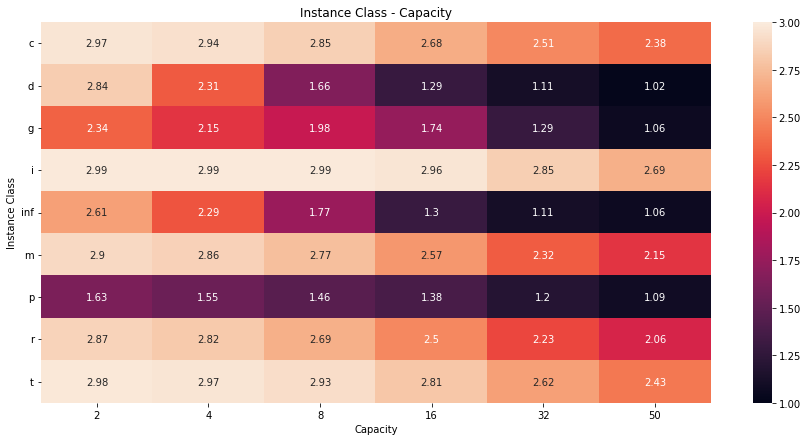

In [11]:
heatmap_vis('Instance Class - Capacity', heatmap_sps, capacity_list, class_list)